### File Unloading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report 
import pickle
from pathlib import Path

In [ ]:
df= pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')
df.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [ ]:
print('Ukuran Data:', df.shape)
print(df.nunique())

Ukuran Data: (6950, 13)
UpdatedAt              1
customerID          6950
gender                 2
SeniorCitizen          2
Partner                2
tenure                74
PhoneService           2
StreamingTV            2
InternetService        2
PaperlessBilling       2
MonthlyCharges      1567
TotalCharges        6446
Churn                  2
dtype: int64


In [ ]:
print('Jumlah Missing Value:', df.isnull().sum())

Jumlah Missing Value: UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Exploratory Data Analysis

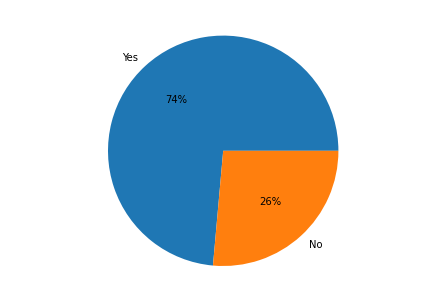

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

Dari grafik diatas, dapat dilihat bahwa persentase jumlah customer yang tidak melakukan churn adalah **74%** sedangkan sisanya 26% melakukan churn. 

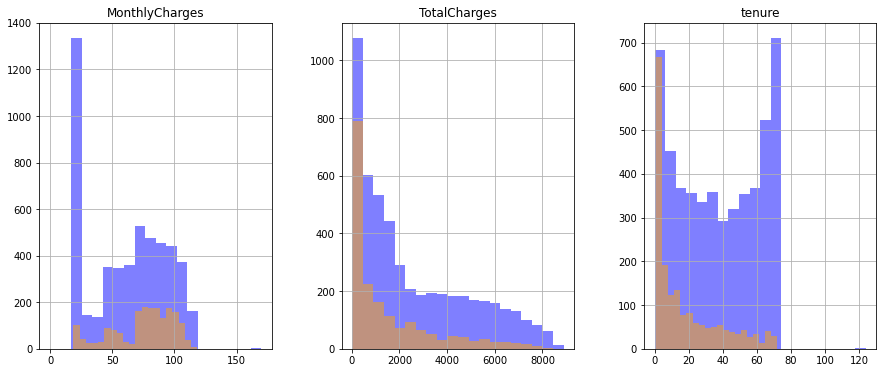

In [ ]:
numerical_features=['MonthlyCharges','TotalCharges','tenure']
fig, ax= plt.subplots(1,3, figsize=(15,6))
df[df.Churn=='No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn=='Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

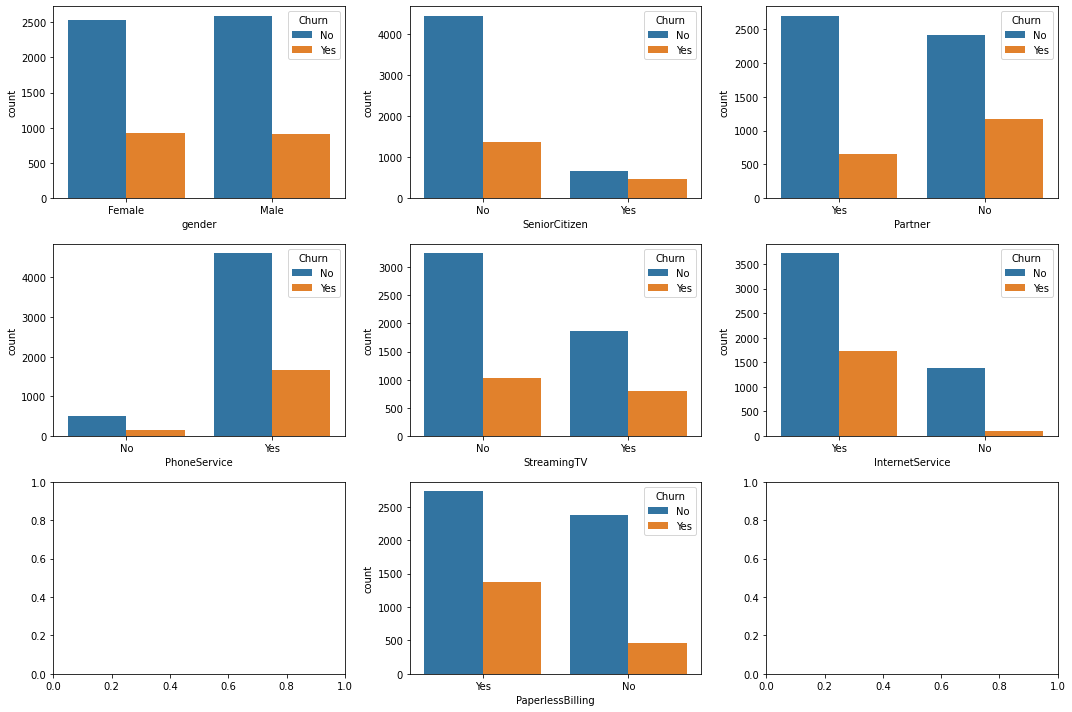

In [ ]:
fig, ax = plt.subplots(3,3, figsize=(15,10))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0] )
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()


Dari grafik diatas dapat disimpulkan beberapa informasi, yaitu:
*   Perbedaan variabel gender antara wanita dan pria tidak terdapat perubahan signifikan untuk gender female dan male melakukan churn
*   Terdapat perbedaan signifikan antara customer yang menggunakan internet service dengan customer yang tidak memiliki internet service. Dimana, customer yang memakai internet service cenderung lebih melakukan churn
*   Untuk pemakaian paperless billing, melalui grafik bar dapat dikatakan bahwa customer yang menggunakan paperless billing lebih mungkin untuk melakukan churn daripada  customer yang tidak memiliki paperless billing
*   Penggunakan phine service diantara customer juga terdapat perbedaan signifikan yaitu customer yang memiliki phoneservice lebih mungkin untuk melakukan churn dari pada yang tidak memiliki phone service





In [ ]:
df1 = df.drop(['UpdatedAt','customerID'], axis=1)
df1.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [ ]:
 for column in df1.columns:
  if df1[column].dtypes==np.number: continue

  df1[column]=LabelEncoder().fit_transform(df1[column])
print(df1.describe())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  


            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [ ]:
df1.describe()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


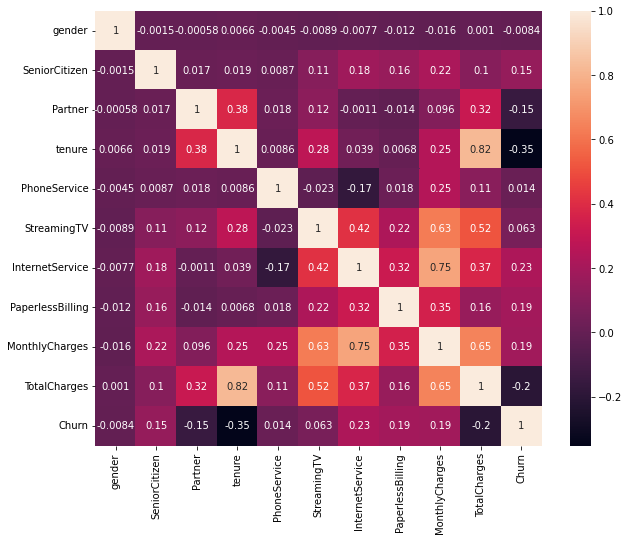

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)
plt.show()

### Splitting Dataset

In [ ]:
# akan dibagi dataset kedalam data training dan data test dengan proporsi 70%:30%
X= df1.drop(['Churn'], axis=1)
y=df1['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Ukuran data X_training:', X_train.shape)
print('Ukuran data y_training:', y_train.shape)
print('Ukuran data X_test:', X_test.shape)
print('Ukuran data y_test:', y_test.shape)

Ukuran data X_training: (4865, 10)
Ukuran data y_training: (4865,)
Ukuran data X_test: (2085, 10)
Ukuran data y_test: (2085,)


### Modelling Data

In [ ]:
logreg = LogisticRegression().fit(X_train, y_train)
print('Model Logistic Regression yang terbentuk adalah:\n', logreg)

Model Logistic Regression yang terbentuk adalah:
 LogisticRegression()


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Performansi Data Training

In [ ]:
# Prediksi
y_train_pred = logreg.predict(X_train)
#Print classification report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.71      4865
weighted avg       0.78      0.80      0.79      4865



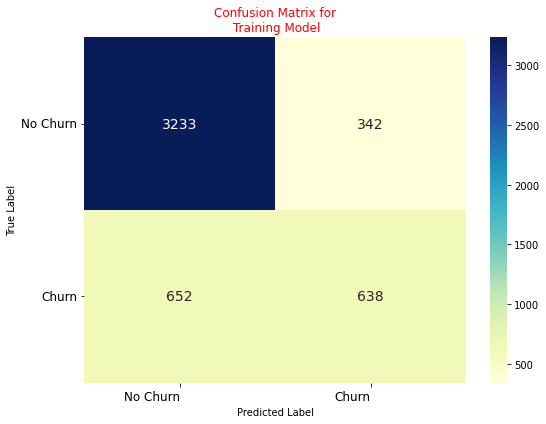

In [ ]:
confusion_matrix_df1= pd.DataFrame((confusion_matrix(y_train ,y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# confusion matrix dengan sns heatmap

plt.figure(figsize=(8,6))
heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
plt.title('Confusion Matrix for\n Training Model', fontsize=12, color='red')
plt.xlabel('Predicted Label',fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Dari confusion dan classification report yang ada dapat disimpulkan bahwa model mampu memprediksi data dengan tingkat accuracy 80%, dengan detil tebakan churn yang sebenarnya churn adalah 638, tidak churn yang sebenarnya tidka churn adalah 3233, yang tidak churn dan sebenarnya churn adalah 652 serta yang churn dan sebenarnya tidak churn adalah 342

#### Performansi Data Testing

In [ ]:
y_test_pred=logreg.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



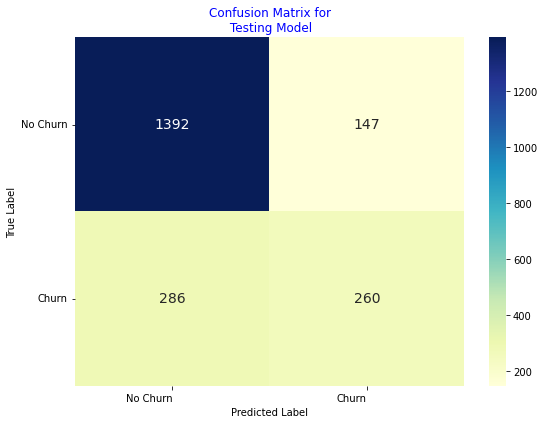

In [ ]:
confusion_matrix_df1 = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

plt.figure(figsize=(8,6))
heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.title('Confusion Matrix for\n Testing Model', fontsize=12, color='blue')
plt.xlabel('Predicted Label', fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Dari confusion matrix dan classification report yang dihasilkan pada model testing dapat disimpulkan bahwa model dapat memprediksi data dengan tingkat accuracy **79%** dengan detail sebagai berikut:
*   Churn yang sebenarnya churn sebesar 260 data
*   Churn yang sebenarnya tidak churn sebesar 147
*   Tidak churn yang sebenarnya churn sebesar 286
*   Tidak churn yang sebenarnya tidak churn sebesar 1392







### Pembuatan Model Random Forest Classifier

#### Training data

In [ ]:
rdf = RandomForestClassifier().fit(X_train, y_train)
print(rdf
      )

RandomForestClassifier()


In [ ]:
y_train_pred = rdf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



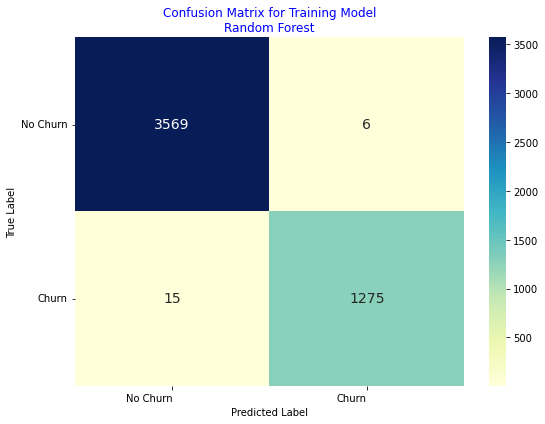

In [ ]:
confusion_matrix_df1 = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

plt.figure(figsize=(8,6))
heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.title('Confusion Matrix for Training Model\nRandom Forest', fontsize=12, color='blue')
plt.xlabel('Predicted Label', fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Dari confusion matrix dan classification report yang dihasilkan pada model training dapat disimpulkan bahwa model dapat memprediksi data dengan tingkat accuracy **100%** dengan detail sebagai berikut:
*   Churn yang sebenarnya churn sebesar 1278 data
*   Churn yang sebenarnya tidak churn sebesar 10
*   Tidak churn yang sebenarnya churn sebesar 12
*   Tidak churn yang sebenarnya tidak churn sebesar 3565



#### Testing Data

In [ ]:
y_test_pred = rdf.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.58      0.48      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



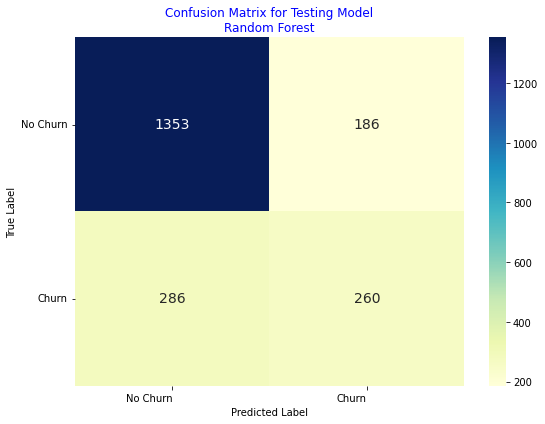

In [ ]:

confusion_matrix_df1 = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

plt.figure(figsize=(8,6))
heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.title('Confusion Matrix for Testing Model\nRandom Forest', fontsize=12, color='blue')
plt.xlabel('Predicted Label', fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Dari confusion matrix dan classification report yang dihasilkan pada model training dapat disimpulkan bahwa model dapat memprediksi data dengan tingkat accuracy **77%** dengan detail sebagai berikut:
*   Churn yang sebenarnya churn sebesar 256 data
*   Churn yang sebenarnya tidak churn sebesar 184
*   Tidak churn yang sebenarnya churn sebesar 290
*   Tidak churn yang sebenarnya tidak churn sebesar 1355

#### Pembuatan Model Gradient Boosting Classifier

#### Data Training

In [ ]:
gbc = GradientBoostingClassifier().fit(X_train, y_train)
print(gbc)

GradientBoostingClassifier()


In [ ]:
y_train_pred= gbc.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



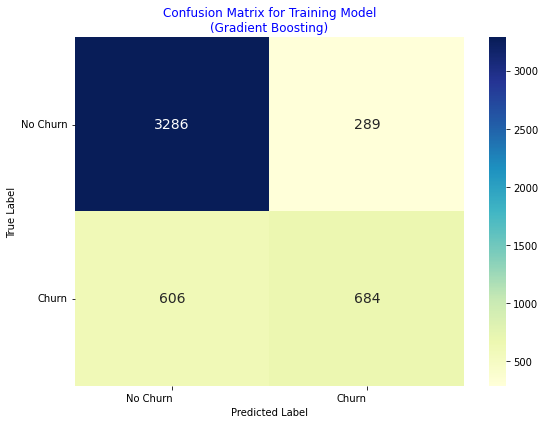

In [ ]:
confusion_matrix_df1 = pd.DataFrame(confusion_matrix(y_train, y_train_pred), ('No Churn','Churn'), ('No Churn','Churn'))

plt.figure(figsize=(8,6))

heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=12, color='blue')
plt.xlabel('Predicted Label', fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

#### Data Testing

In [ ]:
y_test_pred= gbc.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



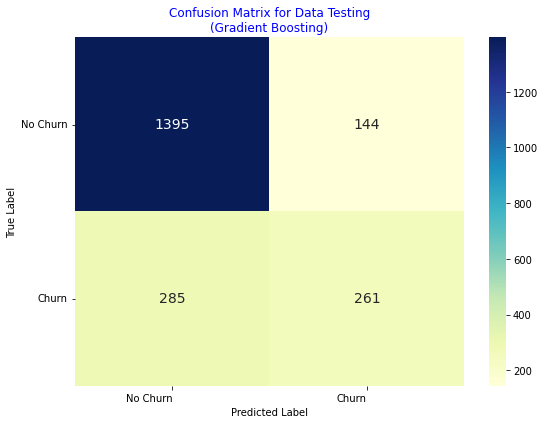

In [ ]:
confusion_matrix_df1 = pd.DataFrame(confusion_matrix(y_test, y_test_pred),('No Churn', 'Churn'),('No Churn','Churn'))

plt.figure(figsize=(8,6))
heatmap=sns.heatmap(confusion_matrix_df1, annot=True, annot_kws={'size':14},
                    fmt='d',cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.title('Confusion Matrix for Data Testing\n(Gradient Boosting)', fontsize=12, color='blue')
plt.xlabel('Predicted Label', fontsize=10, color='black')
plt.ylabel('True Label', fontsize=10, color='black')
plt.tight_layout()
plt.show()

Dari confusion matrix dan classification report yang dihasilkan pada model testing dapat disimpulkan bahwa model dapat memprediksi data dengan tingkat accuracy **79%** dengan detail sebagai berikut:
*   Churn yang sebenarnya churn sebesar 261 data
*   Churn yang sebenarnya tidak churn sebesar 145
*   Tidak churn yang sebenarnya churn sebesar 285
*   Tidak churn yang sebenarnya tidak churn sebesar 1394


In [ ]:
# Save Model
pickle.dump(logreg, open('best_model_churn.pkl','wb'))